### 1- About the project

### 2- Data set

### 3- Install and import libraries and modules

In [ ]:
#pip install numpy
#pip install pandas
#pip install re
#pip instal tqdm
#pip install wordcloud
#pip install matplotlib
#pip install nltk
#pip install sklearn
#pip install sys
#pip install nltk
#pip install sentence_transformers

In [1]:
import numpy as np
import pandas as pd
import re
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import sys
import my_functions as f
import time
import requests
# from nltk import tokenize, word_tokenizes
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
import urllib.request
from urlextract import URLExtract
from selenium import webdriver
from selenium.webdriver import *
from selenium.webdriver.common.by import By
import spacy    
from sentence_transformers import SentenceTransformer, util
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

/home/amr/anaconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/amr/anaconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:651: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 803: system has unsupported display driver / cuda driver combination (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count
2023-06-01 15:00:26.078533: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-06-01 15:00:27.392287: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-01 15:00:27.392608: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Success

tensor(0.1252)
0.0


### 4- Importing the data

In [35]:
# read csv data
data= pd.read_csv("../dataset/1-train/Constraint_Train.csv")


### 5- Understanding the data

In [36]:
data=data.drop(columns=["Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","id",])

In [37]:
data.head(10)

tweet label
0  The CDC currently reports 99031 deaths. In gen...  real
1  States reported 1121 deaths a small rise from ...  real
2  Politically Correct Woman (Almost) Uses Pandem...  fake
3  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4  Populous states can generate large case counts...  real
5  Covid Act Now found "on average each person in...  real
6  If you tested positive for #COVID19 and have n...  real
7  Obama Calls Trump’s Coronavirus Response A Cha...  fake
8  ???Clearly, the Obama administration did not l...  fake
9  Retraction—Hydroxychloroquine or chloroquine w...  fake

In [38]:
for i in range(len(data)):
    print(i)
    print(data.tweet[i])
    print(data.label[i])
    print("---------------------------------")

0
The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.
real
---------------------------------
1
States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux
real
---------------------------------
2
Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville
fake
---------------------------------
3
#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ
real
---------------------------------
4
Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: 

In [6]:
print("Length: ",len(data))
print("Shape: ",data.shape)

Length:  6420
Shape:  (6420, 3)


In [7]:
print(data[['label']].describe())


       label
count   6420
unique     2
top     real
freq    3360


In [8]:
#Average tweet length
lis = []
count = 0
min=1000
max=0
for i in data['tweet']:
    tweet_count=len(''.join(str(i).split()))
    count += tweet_count
    # print(i)
    if min >tweet_count:
        min=tweet_count
        q=i
    if max<tweet_count:
        max=tweet_count
        x=i
    if tweet_count > 1000:
        lis.append([i , tweet_count])
        

avg_tweet_length = count / len(data['tweet'])

print("Average Tweet length is:", avg_tweet_length)
print("minimum Tweet length is:", min)
print("maximum Tweet length is:", max)

# print(q)
# print("----------------------")
# print(x)

print(len(lis))


Average Tweet length is: 155.5588785046729
minimum Tweet length is: 16
maximum Tweet length is: 7368
3


In [9]:
for k in range(len(lis)):
    print(lis[k][0])
    print("################")
    print(lis[k][1])
    print("################")
    print("\n\n\n\n---------------------------------------\n\n\n\n")

Amoxi" Capsule made in US is the only medicine that can completely cure COVID-19.
Egyptian Health Minister arrive in Italy with secret coronavirus cure.
 Dr Charles Lieber a Harvard professor has been arrested in the USA for manufacturing the coronavirus and selling it to China. A video news report from WCVB a TV station in Boston Massachusetts is shared with the Facebook post.
Mountain Matterhorn in Switzerland was lit in three colours of Indian flag as a token of gratitude to India for sending Hydroxychloroquine.
Al-Azhar Imam said he is considering exceptions on Ramadan fasting as the research says that the mouth must be kept wet to prevent COVID-19
 Japanese Nobel Tasuku Honjo says coronavirus was created in the Wuhan laboratory
A man collapses in 5 minutes after showing COVID-19 symptoms in India.
Celebrities spreading misinformation about coronavirus and the Janata curfew in India.
 Multiple posts shared repeatedly on Facebook and Twitter since March 2020 claim that Israel has re

### 6- data Preprocessing

##### 6.1 cleaning data

In [6]:
cleaned=data
for ind in range(len(cleaned)):
    tweet=f.remove_emoji(cleaned.tweet[ind])
    tweet=f.remove_symbols(tweet)
    tweet=f.remove_space(tweet)
    tweet=f.extract_mention(tweet)
    tweet=f.remove_urls(tweet)
    cleaned.tweet[ind]=tweet
    
    
cleaned.head(10)

tweet label
0  The CDC currently reports 99031 deaths. In gen...  real
1  States reported 1121 deaths a small rise from ...  real
2  Politically Correct Woman (Almost) Uses Pandem...  fake
3  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4  Populous states can generate large case counts...  real
5  Covid Act Now found "on average each person in...  real
6  If you tested positive for #COVID19 and have n...  real
7  Obama Calls Trump’s Coronavirus Response A Cha...  fake
8   Clearly, the Obama administration did not lea...  fake
9  Retraction—Hydroxychloroquine or chloroquine w...  fake

In [27]:
for i in range(10):
    print(data.tweet[i])
    print(data.label[i])
    print("---------------------------------")

The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.
real
---------------------------------
States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. 
real
---------------------------------
Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag  #coronavirus #nashville
fake
---------------------------------
#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done :  DG  #StaySafe #IndiaWillWin 
real
---------------------------------
Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC. 
real
---------------------------------
Covid Act Now found "on averag

In [60]:
for i in range(10):
    print(cleaned.tweet[i])
    print(cleaned.label[i])
    print("---------------------------------")

The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.
real
---------------------------------
States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. 
real
---------------------------------
Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag  #coronavirus #nashville
fake
---------------------------------
#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : DG #StaySafe #IndiaWillWin 
real
---------------------------------
Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC. 
real
---------------------------------
Covid Act Now found "on average 

In [26]:
from urlextract import URLExtract

def convert_short_url_to_long_url_in_line(dataset):
    find_count=0
    nfind_count=0
    for line in dataset["tweet"]:
        extractor = URLExtract()
        urls = extractor.find_urls(line)
        print(urls)
        for url in urls:
            print(url)
            if url:
                
                if url[-1]=='.':
                    print("dot")
                    url=url[:-1]
                    print(url)

                try:
                    l_url = urllib.request.urlopen(url)
                    print(l_url.url)
                    print("find")
                    find_count +=1
                    
                except:
                    print("not found")
                    nfind_count +=1
                    
                    continue

            
            
        print("\n\n\n#########\n\n\n")
        
    print(find_count)
    print(nfind_count)
        

In [25]:
convert_short_url_to_long_url_in_line(data[0:40])

[]
--------



#########



['https://t.co/YASGRTT4ux']
--------
https://t.co/YASGRTT4ux
not found



#########



['https://t.co/thF8GuNFPe']
--------
https://t.co/thF8GuNFPe
https://www.thespoof.com/spoof-news/us/148337/politically-correct-woman-almost-uses-pandemic-as-excuse-not-to-reuse-plastic-bag
find



#########



['https://t.co/Yh3ZxknnhZ']
--------
https://t.co/Yh3ZxknnhZ
not found



#########



['https://t.co/1pYW6cWRaS']
--------
https://t.co/1pYW6cWRaS
not found



#########



['https://t.co/hhigDd24fE']
--------
https://t.co/hhigDd24fE
https://www.wandtv.com/news/real-time-model-shows-infection-growth-rate-slowly-declining/article_cfe5b2e6-8dfa-11ea-9315-dff52574ac73.html
find



#########



['https://t.co/z5kkXpqkYb.', 'https://t.co/9PaMy0Rxaf']
--------
https://t.co/z5kkXpqkYb.
dot
https://t.co/z5kkXpqkYb
not found
https://t.co/9PaMy0Rxaf
not found



#########



['https://t.co/DeDqZEhAsB']
--------
https://t.co/DeDqZEhAsB
https://www.thespoof.com/spoof-news/us/14

ValueError: unknown url type: '-'

##### 6.3 build tfidf

In [7]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data.tweet)
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['00', '000', '00ice', ..., 'áñez', '𝗰𝗼𝗺𝗽𝗹𝗲𝘁𝗲𝗹𝘆', '𝗶𝗻𝗮𝗰𝘁𝗶𝘃𝗮𝘁𝗲'],
      dtype=object)

In [8]:
len(feature_names)

13029

In [9]:
dense = vectors.todense()
denselist = dense.tolist()
tfidf_df = pd.DataFrame(denselist, columns=feature_names)

In [10]:
tfidf_df.head(10)

00  000  00ice  00pm   01  011  0141   02   03  033  ...  zoodirector  \
0  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
1  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
2  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
3  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
4  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
5  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
6  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
7  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
8  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
9  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   

   zookeepers  zoology  zoom  zooming  zydus  zyphr  áñez  𝗰𝗼𝗺𝗽𝗹𝗲𝘁𝗲𝗹𝘆  \
0         0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
1         0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
2         0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
3         0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
4         0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
5         0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
6         0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
7         0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
8         0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
9         0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   

   𝗶𝗻𝗮𝗰𝘁𝗶𝘃𝗮𝘁𝗲  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
5         0.0  
6         0.0  
7         0.0  
8         0.0  
9         0.0  

[10 rows x 13029 columns]

In [11]:
tfidf_df.columns[-50:]

Index(['yorkers', 'yorkshire', 'you', 'youbi', 'young', 'younger', 'your',
       'yours', 'yourself', 'yourselves', 'yourviewtv', 'youth', 'youtube',
       'yr', 'ys', 'yvonne', 'zacks', 'zalima', 'zambales', 'zambia',
       'zamfara', 'zanzibar', 'zaria', 'zealand', 'zealanders', 'zee',
       'zekiri', 'zero', 'zhong', 'zhoushan', 'ziberi', 'zika', 'zinc',
       'zithromax', 'zomato', 'zombie', 'zombies', 'zone', 'zones', 'zoo',
       'zoodirector', 'zookeepers', 'zoology', 'zoom', 'zooming', 'zydus',
       'zyphr', 'áñez', '𝗰𝗼𝗺𝗽𝗹𝗲𝘁𝗲𝗹𝘆', '𝗶𝗻𝗮𝗰𝘁𝗶𝘃𝗮𝘁𝗲'],
      dtype='object')

##### 6.4 build full table

In [12]:
url_column1 = np.zeros(len(data))
url_column2 = np.zeros(len(data))
dict = {'z_url1':url_column1,
        'z_url2': url_column2
        }


In [13]:
added_to_table=pd.DataFrame(dict)


In [14]:
table_for_model=tfidf_df.add(added_to_table, fill_value=0)


In [15]:
table_for_model

00  000  00ice  00pm   01  011  0141   02   03  033  ...  zoodirector  \
0     0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
1     0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
2     0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
3     0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
4     0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
...   ...  ...    ...   ...  ...  ...   ...  ...  ...  ...  ...          ...   
6410  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
6411  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
6412  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
6413  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   
6414  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...          0.0   

      zookeepers  zoology  zoom  zooming  zydus  zyphr  áñez  𝗰𝗼𝗺𝗽𝗹𝗲𝘁𝗲𝗹𝘆  \
0            0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
1            0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
2            0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
3            0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
4            0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
...          ...      ...   ...      ...    ...    ...   ...         ...   
6410         0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
6411         0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
6412         0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
6413         0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   
6414         0.0      0.0   0.0      0.0    0.0    0.0   0.0         0.0   

      𝗶𝗻𝗮𝗰𝘁𝗶𝘃𝗮𝘁𝗲  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
6410         0.0  
6411         0.0  
6412         0.0  
6413         0.0  
6414         0.0  

[6415 rows x 13031 columns]

In [17]:
len(tfidf_df.columns)

13029

### 7- Model

In [46]:
label=data.label.replace({"real":1.0,"fake":0.0},inplace=True)

In [ ]:
dtype

In [52]:
data.label

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
6410    0.0
6411    0.0
6412    0.0
6413    0.0
6414    1.0
Name: label, Length: 6415, dtype: object

In [30]:
x_train,x_test,y_train,y_test=train_test_split(table_for_model,data['label'],test_size=0.33)
model = LogisticRegression()
model.fit(x_train, y_train)

ValueError: Input contains NaN

### 8- Evaluation Matrics

### Testing concepts & not used code

In [2]:
counts = {}
for i in range(len(data)):
    words = data.tweet[i].split()
    
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
print(counts)

NameError: name 'data' is not defined

In [47]:
x=sorted(counts.items(), key=lambda x:x[1], reverse=True)

In [49]:
print(x)

[('the', 5960), ('of', 4537), ('to', 3993), ('in', 3657), ('and', 2616), ('a', 2579), ('is', 1986), ('for', 1646), ('are', 1469), ('cases', 1427), ('that', 1262), ('COVID-19', 1191), ('#COVID19', 1151), ('on', 1096), ('from', 1095), ('have', 1028), ('The', 945), ('with', 918), ('has', 918), ('at', 745), ('new', 734), ('be', 657), ('by', 654), ('people', 642), ('coronavirus', 640), ('as', 639), ('been', 605), ('not', 572), ('tests', 569), ('number', 516), ('more', 510), ('we', 497), ('this', 475), ('confirmed', 471), ('&amp;', 459), ('A', 458), ('will', 455), ('can', 451), ('reported', 449), ('was', 446), ('deaths', 445), ('it', 434), ('than', 432), ('total', 415), ('#coronavirus', 402), ('you', 390), ('or', 381), ('our', 377), ('testing', 367), ('all', 360), ('who', 348), ('now', 332), ('India', 328), ('New', 327), ('your', 318), ('an', 310), ('We', 304), ('which', 303), ('there', 295), ('about', 287), ('There', 287), ('states', 286), ('they', 276), ('up', 273), ('report', 269), ('COVI

In [61]:
a=[]
b=[]
for i in range(20):
       a.append(x[i][0])
       b.append(x[i][1])

<BarContainer object of 20 artists>

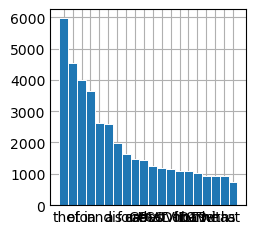

In [55]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')

# plot
fig, ax = plt.subplots()


ax.bar(a, b, width=1, edgecolor="white", linewidth=0.7)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

<Axes: >

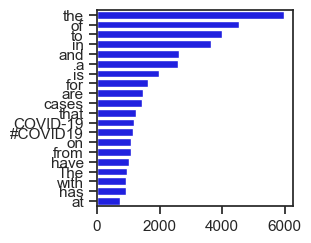

In [60]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(x=b,y=a,color='blue')

In [39]:
for i in range(len(data)):
    text+=data.tweet[i]

In [40]:
print(text)

 The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today. States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville #IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC. https://t.co/1pYW6cWRaS Covid Act Now found "on average each person in Illinois with COVID-19 is infecting 1.11 other people. Data sh